<a href="https://colab.research.google.com/github/ptran1203/anomaly_detection/blob/master/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
from google.colab import drive, output
data_loaded = False
drive.mount('/content/drive')
!rm -rf '/content/anomaly_detection'
!git clone https://github.com/ptran1203/anomaly_detection

TensorFlow 1.x selected.
Mounted at /content/drive
Cloning into 'DAGM_2007'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 149 (delta 86), reused 101 (delta 43), pack-reused 0
Receiving objects: 100% (149/149), 1.14 MiB | 9.38 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [ ]:
cd anomaly_detection

/content/DAGM_2007


In [ ]:
from dataloader import *
from utils import *
from autoencoder import AutoEncoder

BASE_DIR = "/content/drive/My Drive/anomaly_detection"

# For overrding
class DataGen(DataGenerator):
    pass
class AEModel(AutoEncoder):
    pass

ae_model = AEModel(rst=512, lr=0.001, base_dir=BASE_DIR)
if not data_loaded:
    data_gen = DataGen(BASE_DIR, batch_size=8, mode = 1, prune=None,cls=2)
    test_gen = DataGen(BASE_DIR, batch_size=8, mode = 2, cls=2)
    data_loaded = True

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Loading data from /content/drive/My Drive/DAGN2007/dataset/class_2/imgs_train.pkl
load data successfully
Loading data from /content/drive/My Drive/DAGN2007/dataset/class_2/marks_train.pkl
load data successfully
Counter({0: 510, 1: 66})
Loading data from /content/drive/My Drive/DAGN2007/dataset/class_2/imgs_test.pkl
load data successfully
Loading data from /content/drive/My Drive/DAGN2007/dataset/class_2/marks_test.pkl
load data successfully
Counter({0: 492, 1: 84})


In [ ]:
train_from_scratch = True
if train_from_scratch:
    class_weight = {0: 1, 1: 10}
    ae_model.train(data_gen, data_gen, epochs=50,
                    class_weight=class_weight,
                    augment_factor=1)
    ae_model.save_weight()
else:
    ae_model.load_weight()

Train autoencoder model
Train on 576 samples
Train epochs 1/50 - Loss: 0.49795404076576233, Val Loss: 7.929086261325413 - 0:03:46.958918
Train epochs 2/50 - Loss: 0.29562270641326904, Val Loss: 4.850243303510878 - 0:03:22.095820
Train epochs 3/50 - Loss: 0.21846140921115875, Val Loss: 3.2347570260365806 - 0:03:22.169864
Train epochs 4/50 - Loss: 0.14729931950569153, Val Loss: 1.6427130632930331 - 0:03:23.009444
Train epochs 5/50 - Loss: 0.11287392675876617, Val Loss: 0.8854309651586745 - 0:03:23.133315
Train epochs 6/50 - Loss: 0.07955650240182877, Val Loss: 0.3486098100741704 - 0:03:22.740027
Train epochs 7/50 - Loss: 0.07452920079231262, Val Loss: 0.2094695551527871 - 0:03:22.342302
Train epochs 8/50 - Loss: 0.05693044885993004, Val Loss: 0.09154840848512119 - 0:03:21.922942
Train epochs 9/50 - Loss: 0.04031335934996605, Val Loss: 0.08291181342469321 - 0:03:22.581669
Train epochs 10/50 - Loss: 0.04397951066493988, Val Loss: 0.1748180099659496 - 0:03:22.825677
Train epochs 11/50 - Los

(array([  8,  11,  12,  19,  21,  22,  30,  41,  54,  64,  74,  84,  95,
        98, 112, 114, 128, 129, 130, 141, 143, 149, 151, 154, 180, 183,
       184, 186, 188, 192, 202, 209, 224, 237, 239, 240, 243, 249, 255,
       259, 288, 291, 295, 302, 303, 306, 308, 314, 315, 321, 326, 333,
       335, 340, 346, 354, 355, 360, 365, 368, 382, 386, 387, 391, 403,
       410, 428, 444, 453, 461, 474, 476, 482, 485, 502, 506, 527, 533,
       534, 538, 555, 564, 572, 573]),)


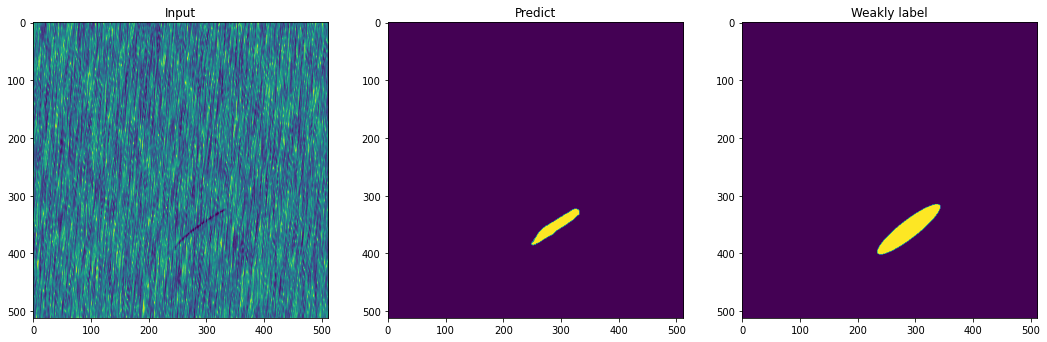

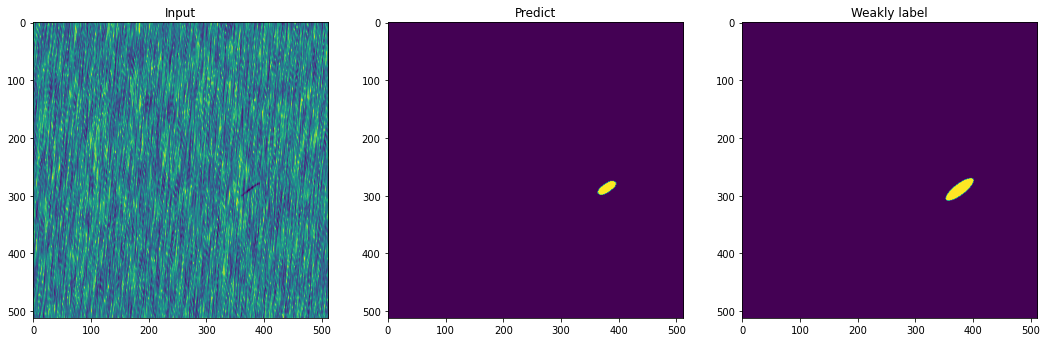

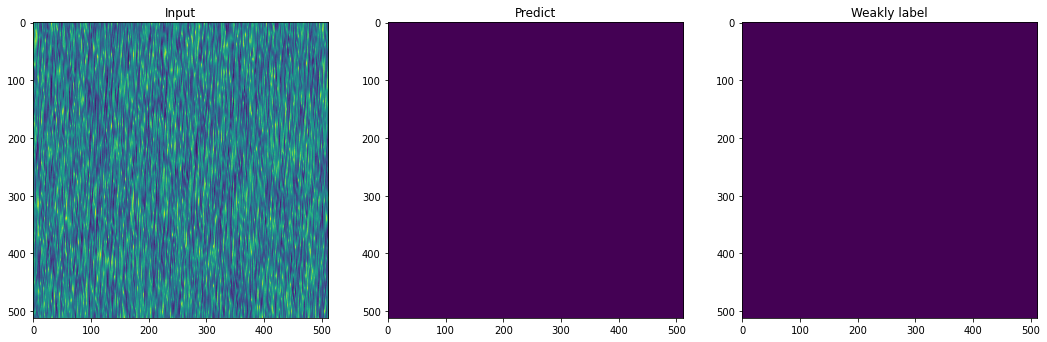

In [ ]:

gen_obj = test_gen
# gen_obj = data_gen

start = 0
idx = np.where(gen_obj.labels == 1)
print(idx)
for i in [365, 502, 505]:
    ae_model.show_output(gen_obj.x, gen_obj.y, i)
